# Text Analytics - Amazon Review Analysis

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from textblob import TextBlob
import logging
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import time
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns
from tqdm.notebook import tqdm
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import string
from sklearn.base import TransformerMixin
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from collections import Counter
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
!pip install imblearn
from imblearn.over_sampling import SMOTE
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
import urllib.request
import zipfile
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
print("Libraries imported successfully!")

C:\Users\karen\AppData\Local\Temp\ipykernel_5540\1685010143.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Libraries imported successfully!


## Deep Learning

### RNN

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.regularizers import l2

#Reading and splitting
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['Review'] = train['Review'].astype(str)

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train['Review'], train['overall'], test_size=0.30, random_state=10)

#Convert labels to start from 0
y_train_adj = y_train - 1
y_test_adj = y_test - 1

#Encodin adjusted labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_adj)
y_test_encoded = label_encoder.transform(y_test_adj)

In [3]:
#Tokeniz text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [4]:
#Pading sequences
max_length = max(len(sequence) for sequence in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

#Building out RNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(BatchNormalization())  # Normalize embeddings
model.add(SimpleRNN(128, activation='relu'))
model.add(BatchNormalization())  # Normalize RNN output
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Add L2 regularization
model.add(Dense(5, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Train the model
history = model.fit(X_train_pad, y_train_encoded, epochs=15, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
train_accuracy = model.evaluate(X_train_pad, y_train_encoded, verbose=0)[1]
test_accuracy = model.evaluate(X_test_pad, y_test_encoded, verbose=0)[1]
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)



Epoch 1/15


1623/1623 [==============================] - 4594s 3s/step - loss: 0.8754 - accuracy: 0.7636 - val_loss: 0.8320 - val_accuracy: 0.7647
Epoch 2/15
1623/1623 [==============================] - 4890s 3s/step - loss: 0.8269 - accuracy: 0.7641 - val_loss: 0.8261 - val_accuracy: 0.7647
Epoch 3/15
1623/1623 [==============================] - 5003s 3s/step - loss: 0.8263 - accuracy: 0.7641 - val_loss: 0.8253 - val_accuracy: 0.7647
Epoch 4/15
1623/1623 [==============================] - 5603s 3s/step - loss: 0.8263 - accuracy: 0.7641 - val_loss: 0.8255 - val_accuracy: 0.7647
Epoch 5/15
1623/1623 [==============================] - 5516s 3s/step - loss: 0.8264 - accuracy: 0.7641 - val_loss: 1.4693 - val_accuracy: 0.7647
Epoch 6/15
1623/1623 [==============================] - 4902s 3s/step - loss: 0.8263 - accuracy: 0.7641 - val_loss: 0.8254 - val_accuracy: 0.7647
Training Accuracy: 0.7641908526420593
Test Accuracy: 0.7619878053665161


In [18]:
from sklearn.metrics import roc_curve, auc

#Will Predict probabilities for test set
y_pred_prob = model.predict(X_test_pad)

3477/3477 [==============================] - 453s 130ms/step


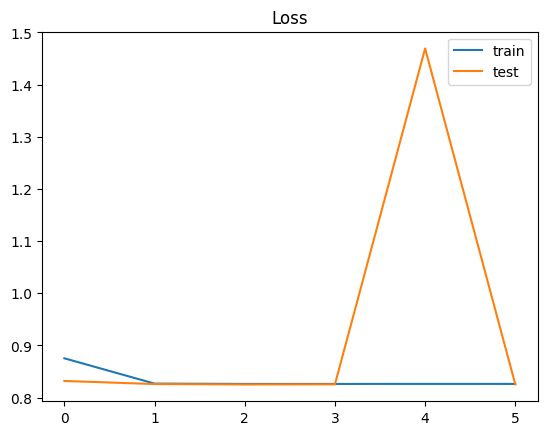

In [24]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

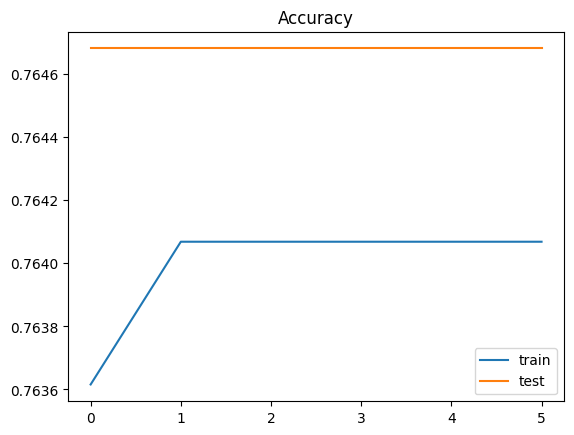

In [25]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [23]:
#Sample Submission sample_submission.csv for RNN4
test['Review'] = test['Review'].astype(str)
X_test_seq = tokenizer.texts_to_sequences(test['Review'])
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

predictions = model.predict(X_test_pad)

#We r converting predicted probabilities to class labels
predicted_labels = predictions.argmax(axis=1) + 1  #Thats why I am adding 1 to match the original class labels

#I am creating a dataFrame with review IDs and predicted ratings
submission_df = pd.DataFrame({'id': test['id'], 'overall': predicted_labels})

#Now gonna save the submission dataFrame to sample_submission.csv
submission_df.to_csv('sample_submission.csv', index=False)

3864/3864 [==============================] - 490s 127ms/step
